In [1]:
from pyforest import *

In [2]:
lazy_imports()

['from pathlib import Path',
 'from sklearn.linear_model import LogisticRegression',
 'import gensim',
 'import torch',
 'from sklearn.preprocessing import LabelEncoder',
 'import plotly.express as px',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.model_selection import KFold',
 'import textblob',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import tensorflow as tf',
 'from pyspark import SparkContext',
 'import plotly as py',
 'from sklearn.cluster import KMeans',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import sklearn',
 'from sklearn.decomposition import PCA',
 'import dash',
 'from sklearn.linear_model import Lasso',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LassoCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import pickle',
 'import pandas as pd',
 'import skimage',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import Ridge',
 'from dask import

In [3]:
df = pd.read_csv("C:/Users/vmallidi3/Downloads/projects/BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

## Visualizations

In [9]:
import warnings

warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Distribution of "Class" Attribute'}, xlabel='class', ylabel='Density'>

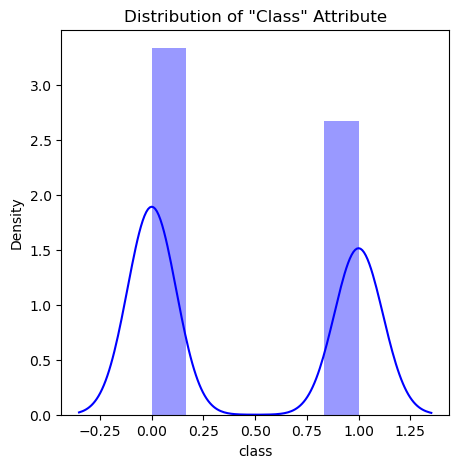

In [10]:
plt.figure(figsize = (5, 5))
plt.title('Distribution of "Class" Attribute')
sns.distplot(df['class'], color = 'blue')

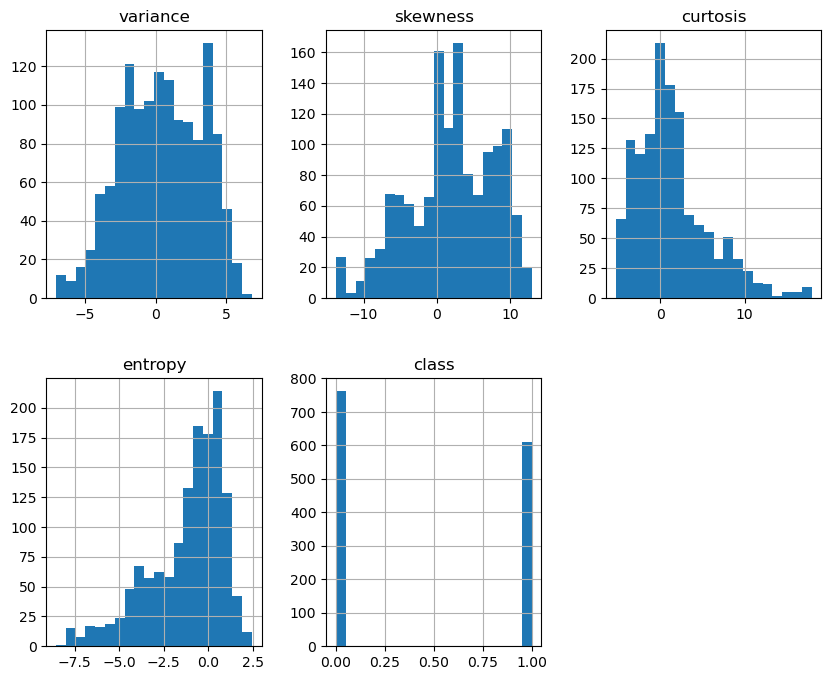

In [11]:
df.hist(bins = 20, figsize = (10, 8), layout = (2, 3));

<IPython.core.display.Javascript object>

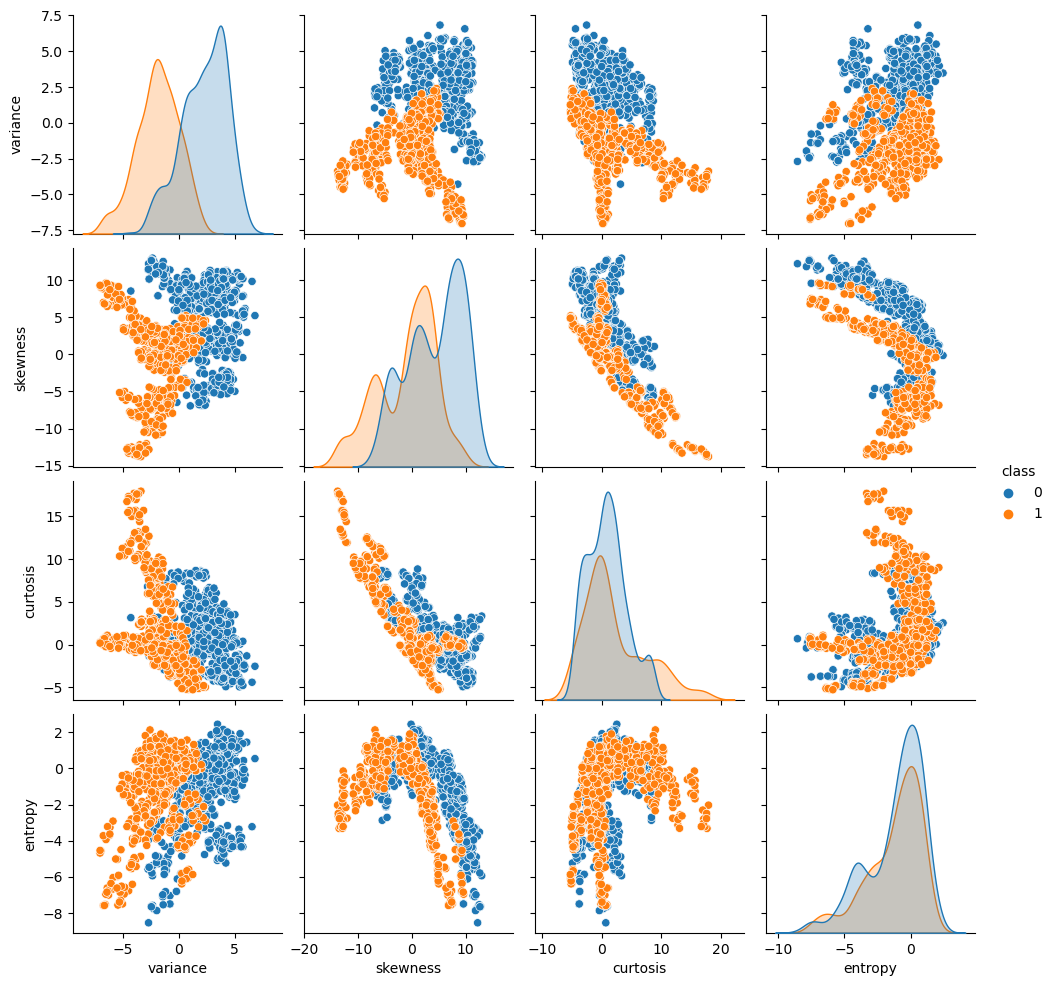

In [12]:
sns.pairplot(df, hue="class")

In [13]:
X = df.drop('class', axis = 1)
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

## Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [16]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [17]:
X_test

array([[-1.40564511, -0.03629527, -0.25946279, -0.55356298],
       [ 0.27456924,  0.39719812,  0.19050204,  0.69982149],
       [-1.56677623, -1.70567084,  2.36049857, -0.08188265],
       ...,
       [ 0.33303672,  0.90277959, -0.894603  ,  0.10774845],
       [ 0.24291663, -0.00314587, -0.98169159,  0.65423293],
       [ 0.44734548,  0.89770987, -0.5083209 , -0.56573811]])

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [19]:
classifier = LogisticRegression(solver = 'liblinear', random_state = 1)
classifier.fit(X_train, y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies)

y_pred = classifier.predict(X_test)

print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9835863219349459


In [20]:
accuracy_score(y_test, y_pred)

0.9745454545454545

Confusion Matrix For Logistic Regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

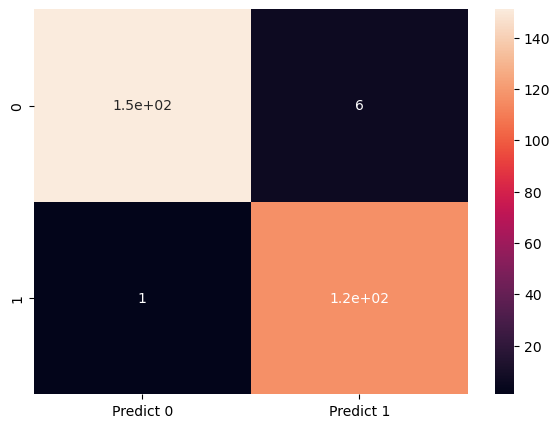

In [21]:
print("Confusion Matrix For Logistic Regression")
cm = metrics.confusion_matrix(y_test, y_pred, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [23]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [24]:
final_KNN_Model = grid.best_estimator_

In [25]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [26]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [27]:
KNN_predicted = KNN.predict(X_test)

accuracy_score(y_test,KNN_predicted)

1.0

Confusion Matrix For KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

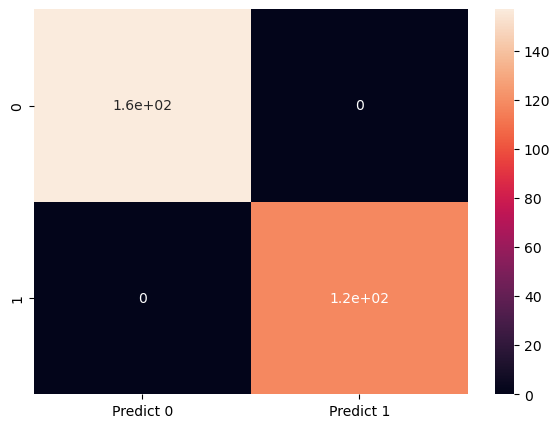

In [28]:
print("Confusion Matrix For KNN")
cm=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Support Vector Machine

In [29]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [30]:
svm_pred=svm_classifier.predict(X_test)

print("Mean Accuracy: ",svm_accuracies.mean())

Mean Accuracy:  0.9854045037531277


In [31]:
accuracy_score(y_test,svm_pred)

0.9818181818181818

Confusion Matrix For svm_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

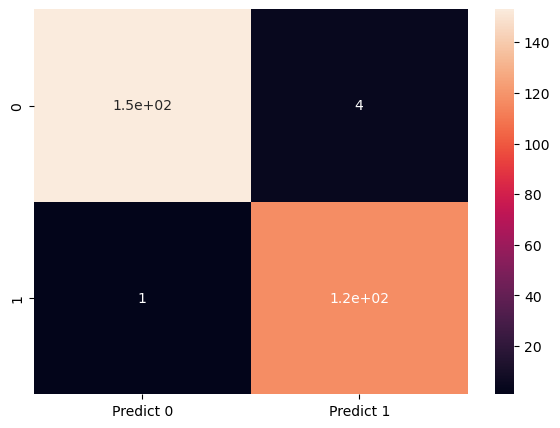

In [32]:
print("Confusion Matrix For svm_pred")
cm=metrics.confusion_matrix(y_test,svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Support Vector Machine (rbf)

In [34]:
from sklearn.svm import SVC

svm_rbf_classifier=SVC(kernel='rbf',gamma='auto')
svm_rbf_classifier.fit(X_train,y_train)

svm_rbf_accuracies=cross_val_score(estimator=svm_rbf_classifier,X=X_test,y=y_test,cv=10)
print("Accuracies:\n",svm_rbf_accuracies)
print("Mean Accuracy: ",svm_rbf_accuracies.mean())

Accuracies:
 [1.         0.96428571 1.         1.         1.         1.
 0.96296296 1.         1.         1.        ]
Mean Accuracy:  0.9927248677248677


In [35]:
svm_rbf_pred=svm_rbf_classifier.predict(X_test)

accuracy_score(y_test,svm_rbf_pred)

1.0

Confusion Matrix For svm_rbf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

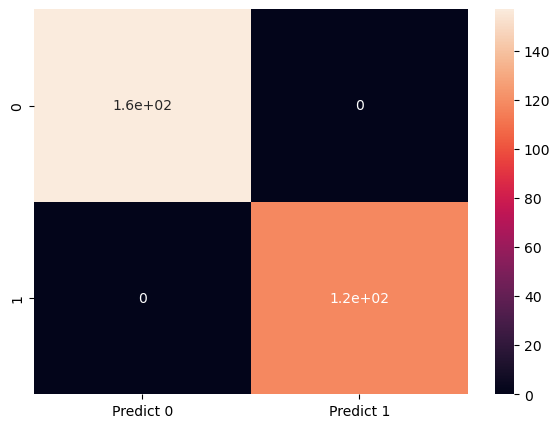

In [36]:
print("Confusion Matrix For svm_rbf")
cm=metrics.confusion_matrix(y_test,svm_rbf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rdf_classifier.fit(X_train,y_train)
rdf_accuracies=cross_val_score(estimator=rdf_classifier,X=X_test,y=y_test,cv=10)
 
print("Accuracies:\n",rdf_accuracies)
print("Mean Accuracy: ",rdf_accuracies.mean())

Accuracies:
 [0.96428571 1.         0.89285714 0.96428571 1.         0.96296296
 1.         0.96296296 1.         1.        ]
Mean Accuracy:  0.9747354497354497


In [38]:
rdf_pred=rdf_classifier.predict(X_test)

accuracy_score(y_test,rdf_pred)

0.9963636363636363

Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

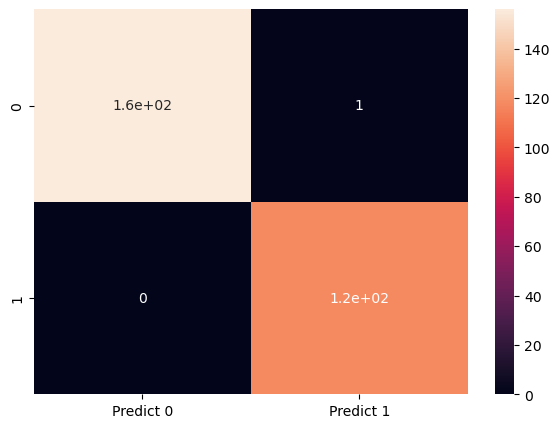

In [39]:
print("Confusion Matrix For Random Forest")
cm=metrics.confusion_matrix(y_test,rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [40]:
print("LogisticRegression:", accuracy_score(y_test,y_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test,svm_pred))
print("Support Vector Machine (using kernel=rbf):", accuracy_score(y_test,svm_rbf_pred))
print("RandomForestClassifier:", accuracy_score(y_test,rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test,KNN_predicted))

LogisticRegression: 0.9745454545454545
Support Vector Machine (using kernel=linear): 0.9818181818181818
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9963636363636363
KNeighborsClassifier: 1.0
